In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #use to make plots and graphs
import seaborn as sns  #data visualization library i.e. make plots
from sklearn.model_selection import train_test_split #split data into training and testing data
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [3]:
#loading the data from csv file to pandas dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
print(insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


C:\Users\bajaj\AppData\Local\Temp\ipykernel_6120\1158946343.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\bajaj\AppData\Local\Temp\ipykernel_6120\1158946343.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\bajaj\AppData\Local\Temp\ipykernel_6120\1158946343.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

In [10]:
# Function to randomly replace values with NaNs
def randomly_replace_values(dataset, replace_fraction=0.2):
    # Iterate over each column
    for col in dataset.columns:
        num_to_replace = int(replace_fraction * len(dataset))
        indices = np.random.choice(dataset.index, num_to_replace, replace=False)
        dataset.loc[indices, col] = np.nan
    return dataset

# Introduce NaN values
insurance_dataset_nans = randomly_replace_values(insurance_dataset.copy(), replace_fraction=0.3)

print("\nDataset after introducing NaNs:")
print(insurance_dataset_nans)


Dataset after introducing NaNs:
       age  sex     bmi  children  smoker  region      charges
0     19.0  1.0     NaN       0.0     NaN     1.0          NaN
1      NaN  NaN  33.770       NaN     1.0     NaN   1725.55230
2      NaN  0.0  33.000       NaN     1.0     NaN   4449.46200
3     33.0  0.0  22.705       0.0     1.0     NaN  21984.47061
4     32.0  NaN  28.880       0.0     1.0     3.0   3866.85520
...    ...  ...     ...       ...     ...     ...          ...
1333  50.0  NaN  30.970       3.0     1.0     3.0          NaN
1334  18.0  1.0  31.920       NaN     NaN     2.0          NaN
1335   NaN  1.0  36.850       0.0     1.0     NaN   1629.83350
1336   NaN  1.0  25.800       NaN     1.0     1.0          NaN
1337  61.0  1.0     NaN       0.0     0.0     3.0          NaN

[1338 rows x 7 columns]


In [11]:
# Fill empty spaces (NaNs) with column-wise minimums
for col in insurance_dataset_nans.columns:
    if insurance_dataset_nans[col].dtype in ['float64', 'int64']:  # For numeric columns
        min_value = insurance_dataset_nans[col].min(skipna=True)  # Find minimum ignoring NaNs
        insurance_dataset_nans[col].fillna(min_value, inplace=True)
    else:  # For non-numeric columns
        min_value = insurance_dataset_nans[col].dropna().min()  # Find lexicographical minimum ignoring NaNs
        insurance_dataset_nans[col].fillna(min_value, inplace=True)

# Verify there are no NaN or empty spaces left
print("\nDataset after replacing NaNs with minimum values:")
print(insurance_dataset_nans)


Dataset after replacing NaNs with minimum values:
       age  sex     bmi  children  smoker  region      charges
0     19.0  1.0  15.960       0.0     0.0     1.0   1121.87390
1     18.0  0.0  33.770       0.0     1.0     0.0   1725.55230
2     18.0  0.0  33.000       0.0     1.0     0.0   4449.46200
3     33.0  0.0  22.705       0.0     1.0     0.0  21984.47061
4     32.0  0.0  28.880       0.0     1.0     3.0   3866.85520
...    ...  ...     ...       ...     ...     ...          ...
1333  50.0  0.0  30.970       3.0     1.0     3.0   1121.87390
1334  18.0  1.0  31.920       0.0     0.0     2.0   1121.87390
1335  18.0  1.0  36.850       0.0     1.0     0.0   1629.83350
1336  18.0  1.0  25.800       0.0     1.0     1.0   1121.87390
1337  61.0  1.0  15.960       0.0     0.0     3.0   1121.87390

[1338 rows x 7 columns]


C:\Users\bajaj\AppData\Local\Temp\ipykernel_6120\1391220454.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_dataset_nans[col].fillna(min_value, inplace=True)


In [12]:
# Check for missing values again
print("\nMissing values after imputation:")
print(insurance_dataset_nans.isnull().sum())


Missing values after imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Categorical Features:Sex,Shape,Region

In [13]:
#statistical measures of the dataset
insurance_dataset_nans.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,32.809417,0.349028,26.193068,0.769058,0.556054,1.007474,9714.346568
std,15.228167,0.476841,8.340115,1.136081,0.497034,1.157695,11632.146280
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
50%,28.000000,0.000000,26.840000,0.000000,1.000000,1.000000,5374.201125
75%,46.000000,1.000000,32.680000,1.000000,1.000000,2.000000,12203.916475
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,62592.873090


C:\Users\bajaj\AppData\Local\Temp\ipykernel_6120\3597991680.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset_nans['age'])
C:\Users\bajaj\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


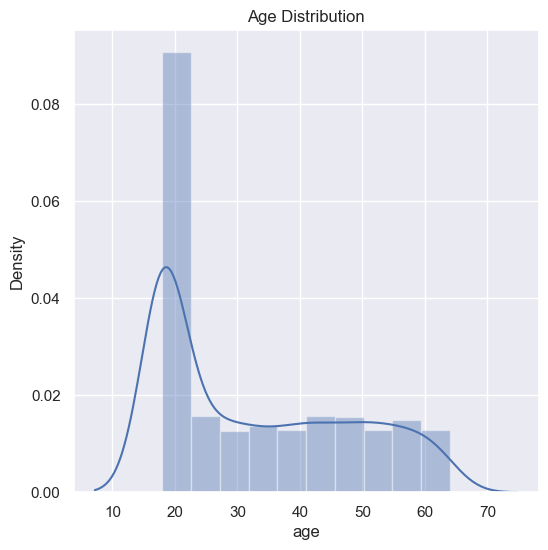

In [14]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['age'])
plt.title('Age Distribution')
plt.show()

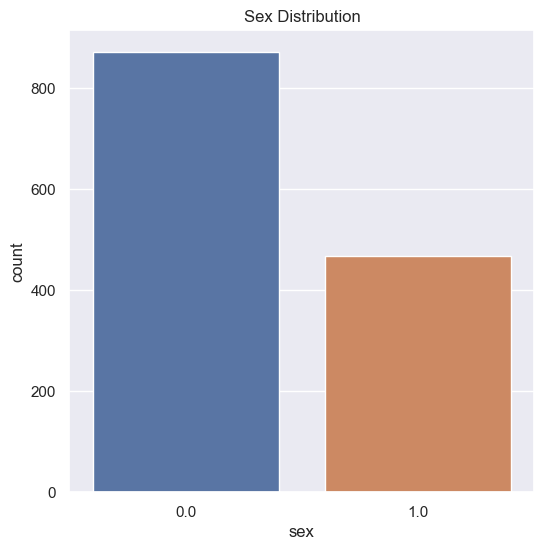

In [15]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset_nans)
plt.title('Sex Distribution')
plt.show()

In [16]:
insurance_dataset_nans['sex'].value_counts()

sex
0.0    871
1.0    467
Name: count, dtype: int64

C:\Users\bajaj\AppData\Local\Temp\ipykernel_6120\3598846418.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset_nans['bmi'])
C:\Users\bajaj\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


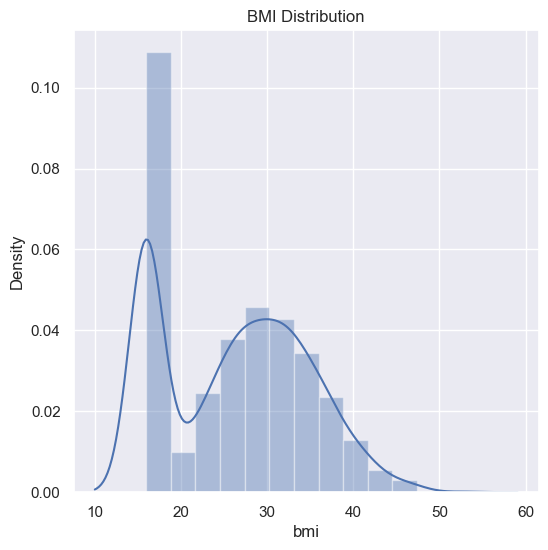

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

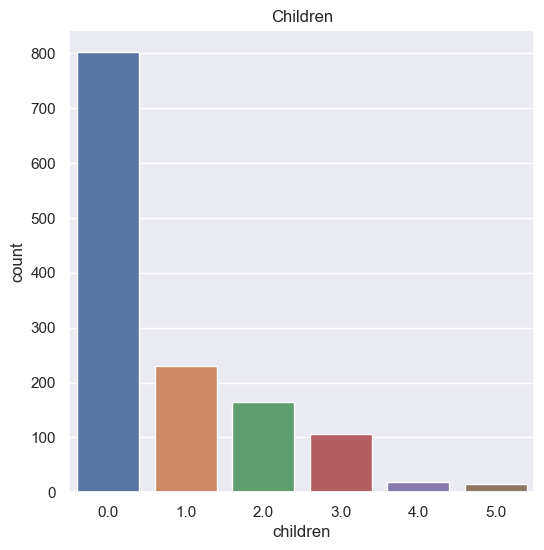

In [18]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset_nans)
plt.title('Children')
plt.show()

In [19]:
insurance_dataset_nans['children'].value_counts()

children
0.0    802
1.0    231
2.0    165
3.0    107
4.0     18
5.0     15
Name: count, dtype: int64

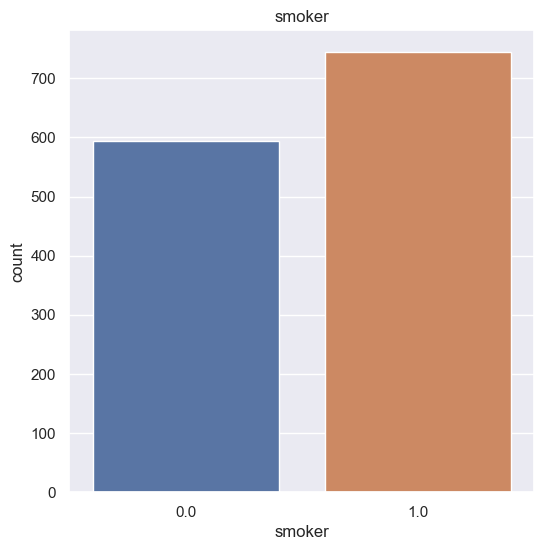

In [20]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset_nans)
plt.title('smoker')
plt.show()

In [21]:
insurance_dataset_nans['smoker'].value_counts()

smoker
1.0    744
0.0    594
Name: count, dtype: int64

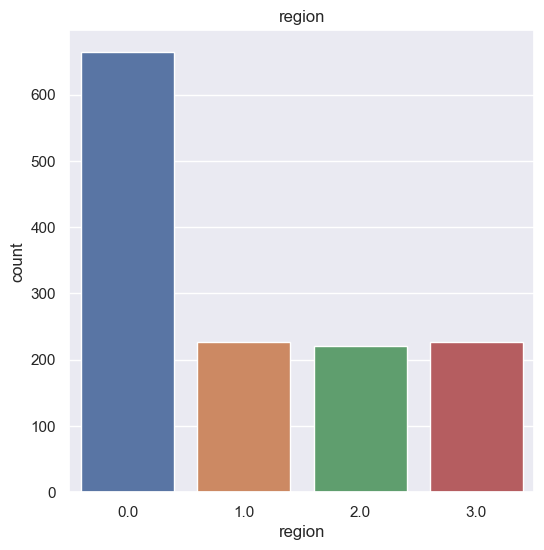

In [22]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset_nans)
plt.title('region')
plt.show()

In [24]:
insurance_dataset_nans['region'].value_counts()

region
0.0    664
1.0    227
3.0    227
2.0    220
Name: count, dtype: int64

C:\Users\bajaj\AppData\Local\Temp\ipykernel_6120\1558265667.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset_nans['charges'])
C:\Users\bajaj\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


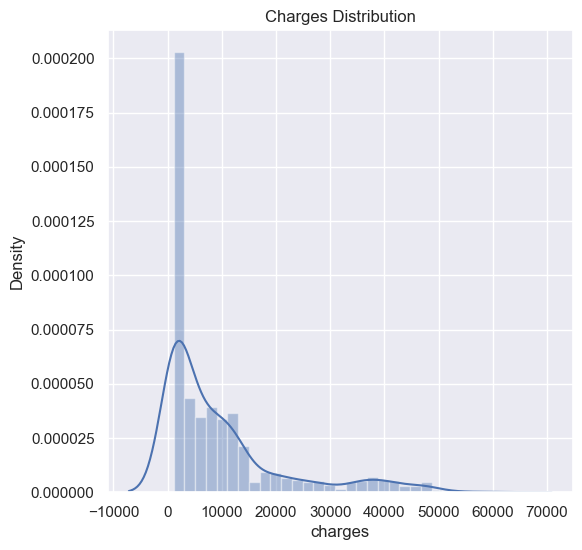

In [25]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['charges'])
plt.title('Charges Distribution')
plt.show()

Splitting the Feautures and Target

In [26]:
X=insurance_dataset_nans.drop(columns='charges',axis=1)
y=insurance_dataset_nans['charges']
print(X)

       age  sex     bmi  children  smoker  region
0     19.0  1.0  15.960       0.0     0.0     1.0
1     18.0  0.0  33.770       0.0     1.0     0.0
2     18.0  0.0  33.000       0.0     1.0     0.0
3     33.0  0.0  22.705       0.0     1.0     0.0
4     32.0  0.0  28.880       0.0     1.0     3.0
...    ...  ...     ...       ...     ...     ...
1333  50.0  0.0  30.970       3.0     1.0     3.0
1334  18.0  1.0  31.920       0.0     0.0     2.0
1335  18.0  1.0  36.850       0.0     1.0     0.0
1336  18.0  1.0  25.800       0.0     1.0     1.0
1337  61.0  1.0  15.960       0.0     0.0     3.0

[1338 rows x 6 columns]


In [27]:
print(y)

0        1121.87390
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333     1121.87390
1334     1121.87390
1335     1629.83350
1336     1121.87390
1337     1121.87390
Name: charges, Length: 1338, dtype: float64


In [28]:
from sklearn.model_selection import train_test_split

# Example: Assuming X (features) and y (target) are already defined as your dataset
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Print the shapes of the full dataset, training set, and testing set
print("Full dataset shape (X):", X.shape)
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)

Full dataset shape (X): (1338, 6)
Training set shape (X_train): (1070, 6)
Testing set shape (X_test): (268, 6)


In [29]:
#loading the Linear Regression Model
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [30]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [31]:
from sklearn import metrics
# R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared vale:',r2_train)

R squared vale: 0.17406132303442534


In [32]:
#prediction on training data
test_data_prediction=regressor.predict(X_test)

In [33]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared vale:',r2_test)

R squared vale: 0.1402279791951463


Building a Predictive System

In [34]:
input_data=(31,1,25.74,0,1,0) # charges: 3756.6216
#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD', prediction[0])

[5375.11616123]
The insurance cost is USD 5375.11616123111


C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume these are your actual and predicted values (example data)
actual_charges = [3756.6216]  # Replace with actual values of insurance cost
predicted_charges = prediction  # Predicted value from the regressor

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_charges, predicted_charges)

# Calculate Mean Squared Error
mse = mean_squared_error(actual_charges, predicted_charges)

# Calculate Root Mean Squared Error (optional, for better interpretability)
rmse = mse ** 0.5

# Calculate R² Score
r2 = r2_score(actual_charges, predicted_charges)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1618.4945612311099
Mean Squared Error (MSE): 2619524.644734683
Root Mean Squared Error (RMSE): 1618.4945612311099
R² Score: nan


C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [36]:
from sklearn.metrics import mean_absolute_error

# Assume these are your actual and predicted values (example data)
actual_charges = [3756.6216]  # Replace with actual values of insurance cost
predicted_charges = prediction  # Predicted value from the regressor

# Calculate MAPE
mape = np.mean(np.abs((np.array(actual_charges) - np.array(predicted_charges)) / np.array(actual_charges))) * 100

# Accuracy percentage
accuracy = 100 - mape

print("Mean Absolute Percentage Error (MAPE):", mape, "%")
print("Accuracy Percentage:", accuracy, "%")

Mean Absolute Percentage Error (MAPE): 43.08377935193446 %
Accuracy Percentage: 56.91622064806554 %


Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
# Initialize Ridge Regression with a regularization parameter alpha
ridge_regressor = Ridge(alpha=1.0)  # Adjust alpha as needed

In [39]:
# Fit the Ridge Regression model
ridge_regressor.fit(X_train, y_train)

Ridge()

In [40]:
# Predictions on training data
ridge_train_predictions = ridge_regressor.predict(X_train)

In [41]:
# R² Score for training data
ridge_r2_train = r2_score(y_train, ridge_train_predictions)
print('Ridge Regression R² Score (Train):', ridge_r2_train)

Ridge Regression R² Score (Train): 0.17405966180991828


In [42]:
# Predictions on test data
ridge_test_predictions = ridge_regressor.predict(X_test)

In [43]:
ridge_r2_test = r2_score(y_test, ridge_test_predictions)
print('Ridge Regression R² Score (Test):', ridge_r2_test)

Ridge Regression R² Score (Test): 0.14030653182423058


In [44]:
# Calculate MAE, MSE, and RMSE for Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_test_predictions)
ridge_mse = mean_squared_error(y_test, ridge_test_predictions)
ridge_rmse = ridge_mse ** 0.5
print("Ridge Regression Mean Absolute Error (MAE):", ridge_mae)
print("Ridge Regression Mean Squared Error (MSE):", ridge_mse)
print("Ridge Regression Root Mean Squared Error (RMSE):", ridge_rmse)

Ridge Regression Mean Absolute Error (MAE): 8020.194825969414
Ridge Regression Mean Squared Error (MSE): 128186322.0465274
Ridge Regression Root Mean Squared Error (RMSE): 11321.939853511296


In [45]:
# Ridge Regression on sample input data
ridge_prediction = ridge_regressor.predict(input_data_reshaped)
print('The Ridge Regression predicted insurance cost is USD', ridge_prediction[0])

The Ridge Regression predicted insurance cost is USD 5392.176187552817


C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [46]:
# Correct MAPE calculation
ridge_mape = np.mean(np.abs((actual_charges - ridge_prediction) / actual_charges)) * 100

# Accuracy calculation
ridge_accuracy = 100 - ridge_mape

# Print results
print("Ridge Regression Mean Absolute Percentage Error (MAPE):", ridge_mape, "%")
print("Ridge Regression Accuracy Percentage:", ridge_accuracy, "%")

Ridge Regression Mean Absolute Percentage Error (MAPE): 43.53791149880034 %
Ridge Regression Accuracy Percentage: 56.46208850119966 %


SVM as regressor

In [47]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
# Initialize the SVR model with RBF kernel
svr_regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

In [50]:
# Fit the SVR model to the training data
svr_regressor.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [51]:
# Predictions on training data
svr_train_predictions = svr_regressor.predict(X_train)

In [52]:
# R² Score for training data
svr_r2_train = r2_score(y_train, svr_train_predictions)
print('SVM R² Score (Train):', svr_r2_train)

SVM R² Score (Train): -0.09225418506378302


In [53]:
# Predictions on test data
svr_test_predictions = svr_regressor.predict(X_test)

In [54]:
# R² Score for test data
svr_r2_test = r2_score(y_test, svr_test_predictions)
print('SVM R² Score (Test):', svr_r2_test)

SVM R² Score (Test): -0.07366987253890556


In [55]:
# Calculate MAE, MSE, and RMSE for SVM Regression
svr_mae = mean_absolute_error(y_test, svr_test_predictions)
svr_mse = mean_squared_error(y_test, svr_test_predictions)
svr_rmse = svr_mse ** 0.5
print("SVM Mean Absolute Error (MAE):", svr_mae)
print("SVM Mean Squared Error (MSE):", svr_mse)
print("SVM Root Mean Squared Error (RMSE):", svr_rmse)

SVM Mean Absolute Error (MAE): 7617.020112333302
SVM Mean Squared Error (MSE): 160091703.78480408
SVM Root Mean Squared Error (RMSE): 12652.735031794671


In [56]:
# SVM Regression on sample input data
svr_prediction = svr_regressor.predict(input_data_reshaped)
print('The SVM predicted insurance cost is USD', svr_prediction[0])

The SVM predicted insurance cost is USD 5339.272861354417


C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [57]:
from sklearn.metrics import mean_absolute_error

# Assume actual_charges and svr_prediction are your actual and predicted values
# Calculate MAPE for the entire dataset
svr_mape = np.mean(np.abs((actual_charges - svr_prediction) / actual_charges)) * 100

# Calculate accuracy as 100 - MAPE
svr_accuracy = 100 - svr_mape

# Print the results
print("SVM Mean Absolute Percentage Error (MAPE):", svr_mape, "%")
print("SVM Accuracy Percentage:", svr_accuracy, "%")

SVM Mean Absolute Percentage Error (MAPE): 42.129642798050696 %
SVM Accuracy Percentage: 57.870357201949304 %


In [58]:
# Evaluate SVR performance with regression-specific metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R² Score
r2 = r2_score(y_test, svr_test_predictions)
print("R² Score:", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, svr_test_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, svr_test_predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

R² Score: -0.07366987253890556
Mean Absolute Error (MAE): 7617.020112333302
Root Mean Squared Error (RMSE): 12652.735031794671


Decision tree as regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=2)

In [63]:
# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2)

In [64]:
# Predictions on training data
dt_train_predictions = dt_regressor.predict(X_train)

In [65]:
# R² Score for training data
dt_r2_train = r2_score(y_train, dt_train_predictions)
print('Decision Tree R² Score (Train):', dt_r2_train)

Decision Tree R² Score (Train): 0.9491767547346683


In [66]:
# Predictions on test data
dt_test_predictions = dt_regressor.predict(X_test)

In [67]:
# R² Score for test data
dt_r2_test = r2_score(y_test, dt_test_predictions)
print('Decision Tree R² Score (Test):', dt_r2_test)

Decision Tree R² Score (Test): -0.2825735387987691


In [68]:
# Calculate MAE, MSE, and RMSE for Decision Tree Regression
dt_mae = mean_absolute_error(y_test, dt_test_predictions)
dt_mse = mean_squared_error(y_test, dt_test_predictions)
dt_rmse = dt_mse ** 0.5

print("Decision Tree Mean Absolute Error (MAE):", dt_mae)
print("Decision Tree Mean Squared Error (MSE):", dt_mse)
print("Decision Tree Root Mean Squared Error (RMSE):", dt_rmse)

Decision Tree Mean Absolute Error (MAE): 8699.867847076728
Decision Tree Mean Squared Error (MSE): 191240704.71499622
Decision Tree Root Mean Squared Error (RMSE): 13828.980610117154


In [69]:
# Decision Tree Regression on sample input data
dt_prediction = dt_regressor.predict(input_data_reshaped)
print('The Decision Tree predicted insurance cost is USD', dt_prediction[0])

The Decision Tree predicted insurance cost is USD 4779.6023


C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [70]:
# MAPE and Accuracy for Decision Tree Regression
dt_mape = mean_absolute_error(actual_charges, dt_prediction) / actual_charges[0] * 100
dt_accuracy = 100 - dt_mape

print("Decision Tree Mean Absolute Percentage Error (MAPE):", dt_mape, "%")
print("Decision Tree Accuracy Percentage:", dt_accuracy, "%")

Decision Tree Mean Absolute Percentage Error (MAPE): 27.231401214325118 %
Decision Tree Accuracy Percentage: 72.76859878567488 %


Naive bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
# Binning 'charges' into categories (low, medium, high)
insurance_dataset['charges_category'] = pd.cut(
    insurance_dataset['charges'],
    bins=[0, 10000, 20000, insurance_dataset['charges'].max()],
    labels=['Low', 'Medium', 'High']
)

In [81]:
# Drop the original 'charges' column
X = insurance_dataset.drop(columns=['charges', 'charges_category'], axis=1)
y = insurance_dataset['charges_category']

In [82]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [83]:
# Initialize Gaussian Naïve Bayes model
nb_model = GaussianNB()

In [84]:
# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [85]:
# Predictions
y_pred = nb_model.predict(X_test)

In [86]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naïve Bayes Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Naïve Bayes Accuracy: 0.6865671641791045

Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.75      0.72        51
         Low       0.69      1.00      0.81       146
      Medium       0.00      0.00      0.00        71

    accuracy                           0.69       268
   macro avg       0.46      0.58      0.51       268
weighted avg       0.50      0.69      0.58       268


Confusion Matrix:
 [[ 38  13   0]
 [  0 146   0]
 [ 17  54   0]]


C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Lasso

In [87]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
# Ensure you're using the continuous 'charges' column as the target
# X is the same as before (features excluding 'charges')
# y should be the 'charges' column, not the 'charges_category'

X = insurance_dataset.drop(columns=['charges', 'charges_category'], axis=1)  # Drop 'charges_category' if present
y = insurance_dataset['charges']  # Use 'charges' as the target variable

In [89]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [90]:
# Initialize the Lasso Regressor
lasso_regressor = Lasso(alpha=1.0, random_state=2)

In [91]:
# Fit the Lasso model to the training data
lasso_regressor.fit(X_train, y_train)

Lasso(random_state=2)

In [92]:
# Predictions on training data
lasso_train_predictions = lasso_regressor.predict(X_train)

In [93]:
# R² Score for training data
lasso_r2_train = r2_score(y_train, lasso_train_predictions)
print('Lasso R² Score (Train):', lasso_r2_train)

Lasso R² Score (Train): 0.7515055550686265


In [95]:
# Predictions on test data
lasso_test_predictions = lasso_regressor.predict(X_test)

In [96]:
# R² Score for test data
lasso_r2_test = r2_score(y_test, lasso_test_predictions)
print('Lasso R² Score (Test):', lasso_r2_test)

Lasso R² Score (Test): 0.7447245444913575


In [97]:
# Calculate MAE, MSE, and RMSE for Lasso Regression
lasso_mae = mean_absolute_error(y_test, lasso_test_predictions)
lasso_mse = mean_squared_error(y_test, lasso_test_predictions)
lasso_rmse = lasso_mse ** 0.5

print("Lasso Mean Absolute Error (MAE):", lasso_mae)
print("Lasso Mean Squared Error (MSE):", lasso_mse)
# print("Lasso Root Mean Squared Error (RMSE):", lasso_rmse)

Lasso Mean Absolute Error (MAE): 4267.164610260892
Lasso Mean Squared Error (MSE): 38337462.37180757


In [98]:
# Lasso Regression on sample input data
lasso_prediction = lasso_regressor.predict(input_data_reshaped)
print('The Lasso predicted insurance cost is USD', lasso_prediction[0])

The Lasso predicted insurance cost is USD 3761.9100317716984


C:\Users\bajaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [99]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
lasso_mape = mean_absolute_error(actual_charges, lasso_prediction) / np.mean(actual_charges) * 100

# Calculate accuracy
lasso_accuracy = 100 - lasso_mape

print("Lasso Mean Absolute Percentage Error (MAPE):", lasso_mape, "%")
print("Lasso Accuracy Percentage:", lasso_accuracy, "%")

Lasso Mean Absolute Percentage Error (MAPE): 0.14077627013853272 %
Lasso Accuracy Percentage: 99.85922372986147 %


In [100]:
# Neural Network

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #allows you to build a model layer by layer
from tensorflow.keras.layers import Dense #used layer in fully connected feedforward neural networks. Each neuron in a Dense layer receives input from all the neurons in the previous layer.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [102]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 128 neurons
    Dense(64, activation='relu'),                              # Hidden layer with 64 neurons
    Dense(32, activation='relu'),                              # Hidden layer with 32 neurons
    Dense(1)                                                   # Output layer for regression (1 neuron)
])
#ReLU (Rectified Linear Unit) is commonly used because it helps avoid issues like vanishing gradients and allows the model to learn non-linear patterns.
     

C:\Users\bajaj\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#Adaptive Moment Estimation

In [105]:
# Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,            # Number of training epochs
    batch_size=32,         # Batch size for training
    verbose=1              # Show training progress
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 339233632.0000 - mae: 13769.2539 - val_loss: 263157456.0000 - val_mae: 12311.5557
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 345380992.0000 - mae: 13725.2617 - val_loss: 262602464.0000 - val_mae: 12291.8535
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 327949120.0000 - mae: 13340.8799 - val_loss: 260574048.0000 - val_mae: 12223.5215
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 336098528.0000 - mae: 13512.9600 - val_loss: 254865872.0000 - val_mae: 12038.4580
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 322279744.0000 - mae: 13078.9229 - val_loss: 241930752.0000 - val_mae: 11624.8926
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 299551936.0000 - mae: 12663.7695 - val_loss: 217614960.0000 - val_mae: 10839.9648
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 267258976.0000 - mae: 11597.2891 - val_loss: 179186416.0000 - val_mae: 9545.7900
Epoch 8

In [106]:
# Evaluate on Test Data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss (MSE):", test_loss)
print("Test Mean Absolute Error (MAE):", test_mae)

Test Loss (MSE): 26363702.0
Test Mean Absolute Error (MAE): 3172.37353515625


In [107]:
# Predictions on Test Data
nn_predictions = model.predict(X_test_scaled)
nn_r2_score = r2_score(y_test, nn_predictions)
print("Neural Network R² Score:", nn_r2_score)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
Neural Network R² Score: 0.8244535373195921


In [108]:
# Calculate MAE, MSE, and RMSE for Neural Network
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_rmse = nn_mse ** 0.5
print("Neural Network Mean Absolute Error (MAE):", nn_mae)
print("Neural Network Mean Squared Error (MSE):", nn_mse)
print("Neural Network Root Mean Squared Error (RMSE):", nn_rmse)

Neural Network Mean Absolute Error (MAE): 3172.3736059829757
Neural Network Mean Squared Error (MSE): 26363701.492978863
Neural Network Root Mean Squared Error (RMSE): 5134.559522780787


In [109]:
# Neural Network Prediction for Sample Input
sample_prediction = model.predict(input_data_reshaped)
print('The Neural Network predicted insurance cost is USD', sample_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The Neural Network predicted insurance cost is USD 275908.62


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# R² Score for Test Data
nn_r2_score = r2_score(y_test, nn_predictions)
print("Neural Network R² Score:", nn_r2_score)

# MAPE and Accuracy
nn_mape = mean_absolute_error(y_test, nn_predictions) / y_test.mean() * 100  # MAPE as a percentage
nn_accuracy = 100 - nn_mape  # Accuracy as a percentage

print("Neural Network Mean Absolute Percentage Error (MAPE):", nn_mape, "%")
print("Neural Network Accuracy Percentage:", nn_accuracy, "%")

Neural Network R² Score: 0.8244535373195921
Neural Network Mean Absolute Percentage Error (MAPE): 24.684428424358217 %
Neural Network Accuracy Percentage: 75.31557157564178 %


Comparison between Models

In [112]:
# Initialize a dictionary to store results
model_results = {
    "Model": [],
    "R² Score (Train)": [],
    "R² Score (Test)": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "MAPE (%)": [],
    "Accuracy (%)": []  # Add Accuracy Percentage column
}

In [113]:
# Helper function to evaluate models
def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred):
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = mse ** 0.5
    mape = (mae / y_test.mean()) * 100
    accuracy = 100 - mape  # Accuracy is 100 - MAPE
    model_results["Model"].append(name)
    model_results["R² Score (Train)"].append(r2_train)
    model_results["R² Score (Test)"].append(r2_test)
    model_results["MAE"].append(mae)
    model_results["MSE"].append(mse)
    model_results["RMSE"].append(rmse)
    model_results["MAPE (%)"].append(mape)
    model_results["Accuracy (%)"].append(accuracy)

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Discretize the target variable (y) into categories
n_bins = 10  # Number of bins for discretization
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_binned = discretizer.transform(y_test.values.reshape(-1, 1)).ravel()

# Fit Naïve Bayes
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train_binned)

# Predict
nb_train_pred_binned = nb_regressor.predict(X_train)
nb_test_pred_binned = nb_regressor.predict(X_test)

# Convert predictions back to continuous values
nb_train_pred = discretizer.inverse_transform(nb_train_pred_binned.reshape(-1, 1)).ravel()
nb_test_pred = discretizer.inverse_transform(nb_test_pred_binned.reshape(-1, 1)).ravel()

# Evaluate Model
evaluate_model("Naïve Bayes Regression", y_train, nb_train_pred, y_test, nb_test_pred)

# Linear Regression
linear_train_pred = regressor.predict(X_train)
linear_test_pred = regressor.predict(X_test)
evaluate_model("Linear Regression", y_train, linear_train_pred, y_test, linear_test_pred)

# Ridge Regression
ridge_train_pred = ridge_regressor.predict(X_train)
ridge_test_pred = ridge_regressor.predict(X_test)
evaluate_model("Ridge Regression", y_train, ridge_train_pred, y_test, ridge_test_pred)

# Lasso Regression
lasso_train_pred = lasso_regressor.predict(X_train)
lasso_test_pred = lasso_regressor.predict(X_test)
evaluate_model("Lasso Regression", y_train, lasso_train_pred, y_test, lasso_test_pred)

# SVM Regression
svm_train_pred = svr_regressor.predict(X_train)
svm_test_pred = svr_regressor.predict(X_test)
evaluate_model("SVM Regression", y_train, svm_train_pred, y_test, svm_test_pred)

# Decision Tree Regression
dt_train_pred = dt_regressor.predict(X_train)
dt_test_pred = dt_regressor.predict(X_test)
evaluate_model("Decision Tree Regression", y_train, dt_train_pred, y_test, dt_test_pred)

# Neural Network
nn_train_pred = model.predict(X_train_scaled).flatten()  # Flatten predictions to match dimensions
nn_test_pred = model.predict(X_test_scaled).flatten()
evaluate_model("Neural Network", y_train, nn_train_pred, y_test, nn_test_pred)

# Convert Results to DataFrame
results_df = pd.DataFrame(model_results)

# Display the Results
print(results_df)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
                      Model  R² Score (Train)  R² Score (Test)          MAE  \
0    Naïve Bayes Regression          0.477580         0.376189  5818.511486   
1         Linear Regression          0.289976         0.302433  5905.136732   
2          Ridge Regression          0.289532         0.302048  5906.081651   
3          Lasso Regression          0.751506         0.744725  4267.164610   
4            SVM Regression         -0.353108        -0.294807  8641.016774   
5  Decision Tree Regression          0.167839         0.034944  7106.568134   
6            Neural Network          0.832346         0.824454  3172.373606   

            MSE          RMSE   MAPE (%)  Accuracy (%)  
0  9.368443e+07   9679.071793  45.274185     54.725815  
1  1.047611e+08  10235.288586  45.948221     54.051779  
2  1.048189e+08  10238.112379  45.955574     54.044426  
3  3.833746e+07   6191.725315  33.203063     66.796937  
4  1

In [115]:
import matplotlib.pyplot as plt

# Add an Accuracy Percentage column to the results
results_df["Accuracy (%)"] = 100 - results_df["MAPE (%)"]

# Display the Results
print(results_df)

# Define a consistent color palette for all plots
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#E58606']


                      Model  R² Score (Train)  R² Score (Test)          MAE  \
0    Naïve Bayes Regression          0.477580         0.376189  5818.511486   
1         Linear Regression          0.289976         0.302433  5905.136732   
2          Ridge Regression          0.289532         0.302048  5906.081651   
3          Lasso Regression          0.751506         0.744725  4267.164610   
4            SVM Regression         -0.353108        -0.294807  8641.016774   
5  Decision Tree Regression          0.167839         0.034944  7106.568134   
6            Neural Network          0.832346         0.824454  3172.373606   

            MSE          RMSE   MAPE (%)  Accuracy (%)  
0  9.368443e+07   9679.071793  45.274185     54.725815  
1  1.047611e+08  10235.288586  45.948221     54.051779  
2  1.048189e+08  10238.112379  45.955574     54.044426  
3  3.833746e+07   6191.725315  33.203063     66.796937  
4  1.944550e+08  13944.713699  67.236267     32.763733  
5  1.449329e+08  12038.80

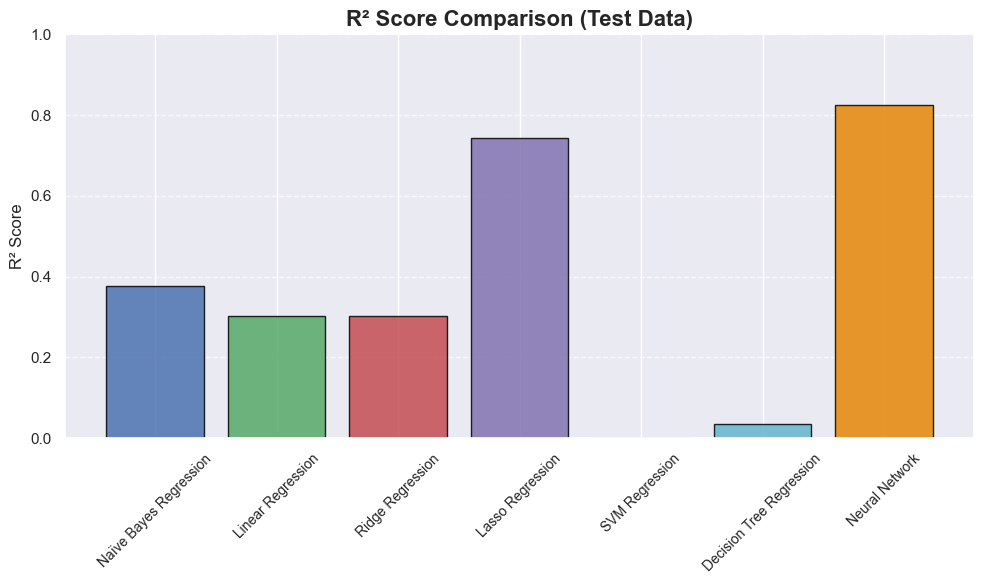

In [116]:
# Plot R² Score Comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["R² Score (Test)"], color=colors, alpha=0.85, edgecolor='black')
plt.title("R² Score Comparison (Test Data)", fontsize=16, weight='bold')
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 1)  # R² Score is typically between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

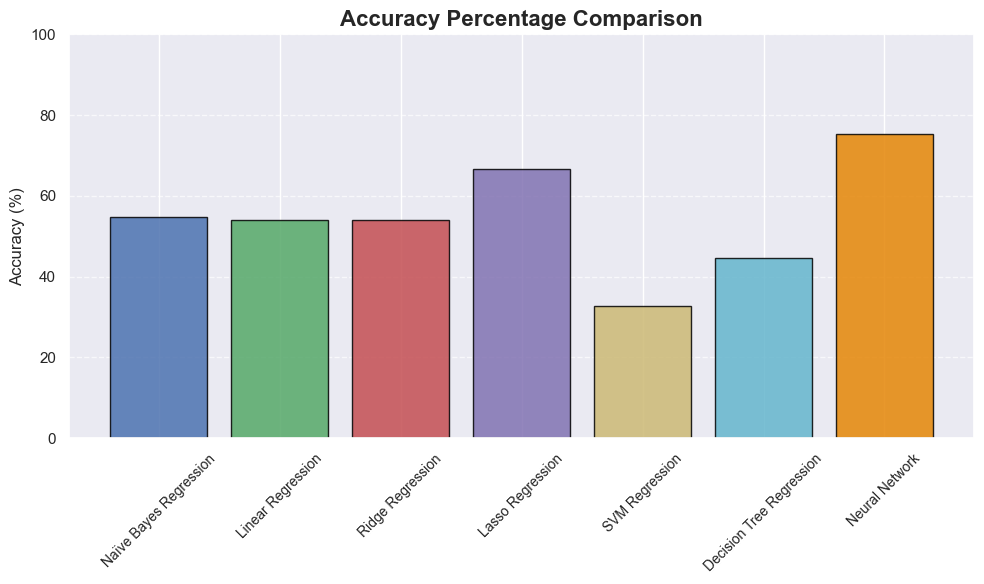

In [117]:
# Plot Accuracy Percentage
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["Accuracy (%)"], color=colors, alpha=0.85, edgecolor='black')
plt.title("Accuracy Percentage Comparison", fontsize=16, weight='bold')
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 100)  # Accuracy percentages range from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

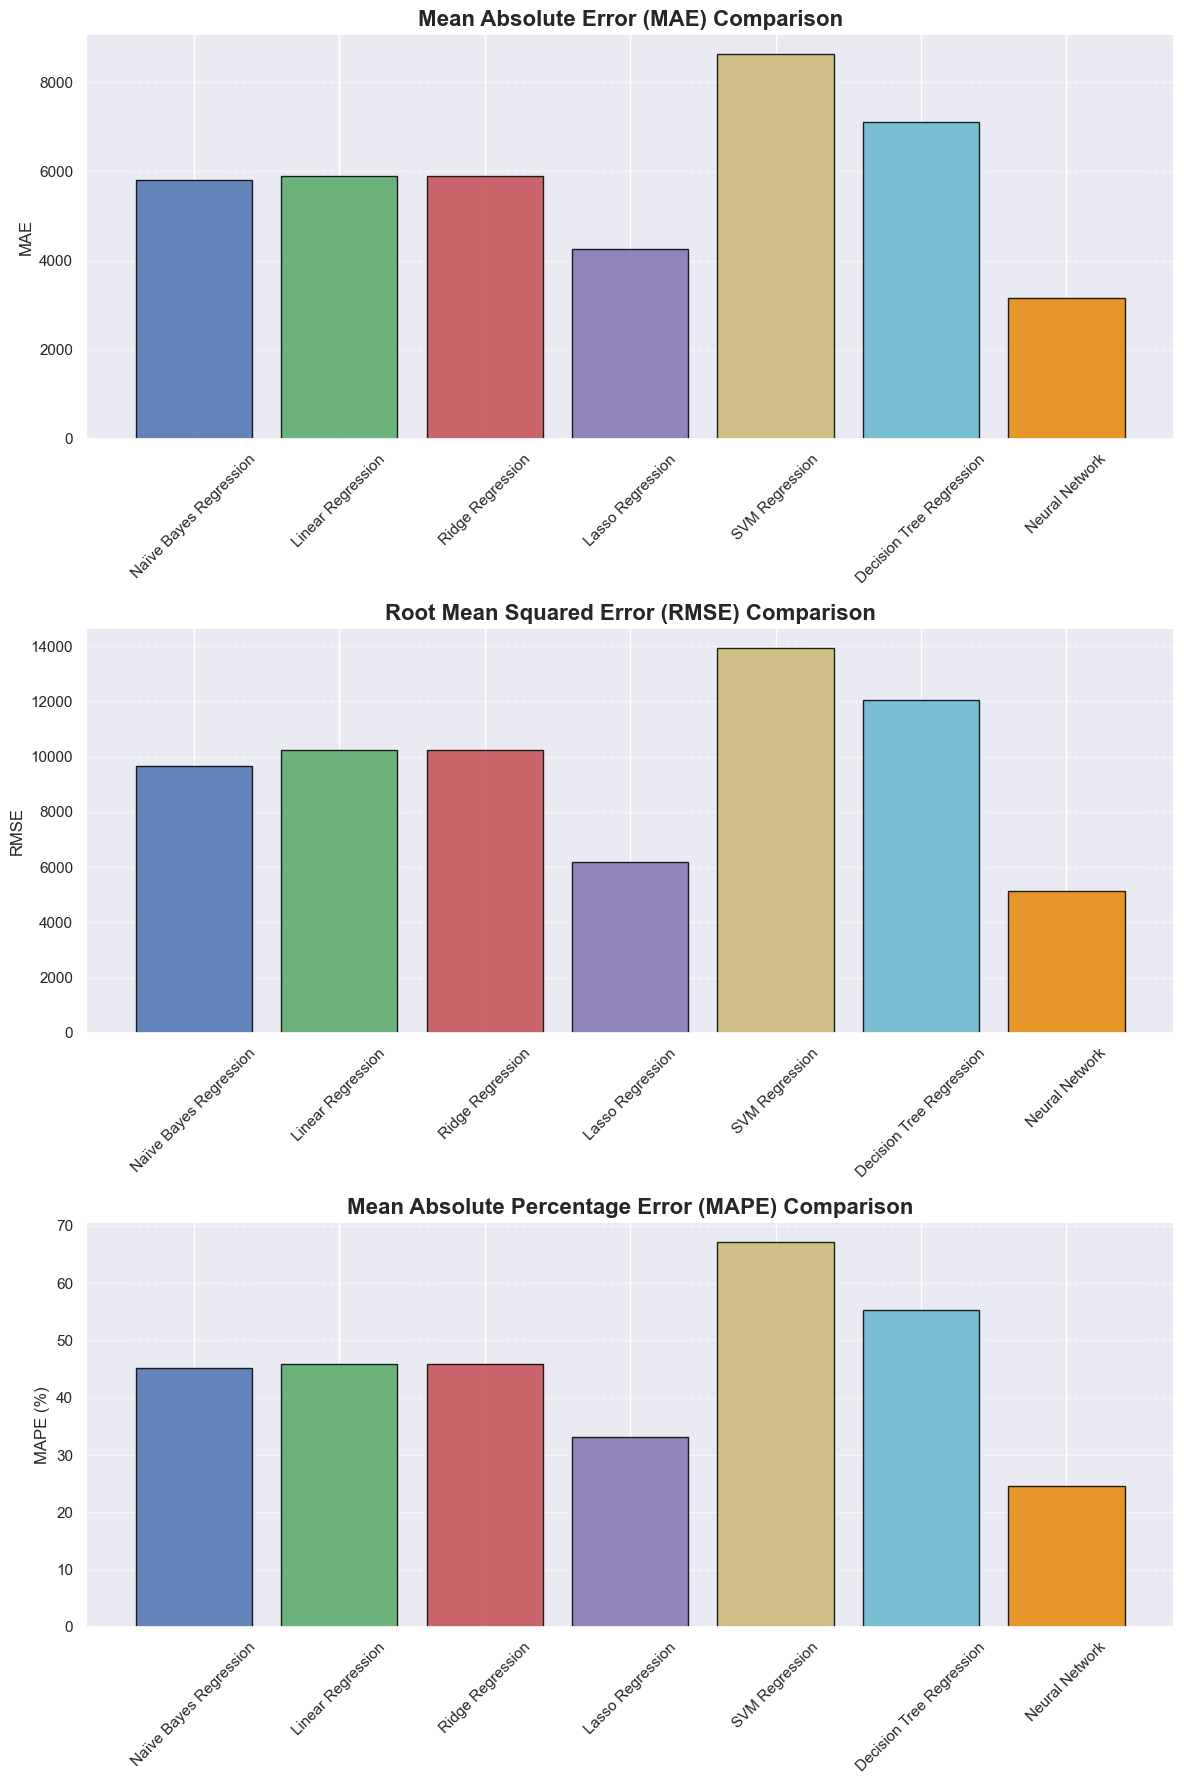

In [118]:
# Plot MAE, RMSE, and MAPE Comparison
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# MAE Plot
axs[0].bar(results_df["Model"], results_df["MAE"], color=colors, alpha=0.85, edgecolor='black')
axs[0].set_title("Mean Absolute Error (MAE) Comparison", fontsize=16, weight='bold')
axs[0].set_ylabel("MAE", fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].tick_params(axis='x', labelrotation=45)

# RMSE Plot
axs[1].bar(results_df["Model"], results_df["RMSE"], color=colors, alpha=0.85, edgecolor='black')
axs[1].set_title("Root Mean Squared Error (RMSE) Comparison", fontsize=16, weight='bold')
axs[1].set_ylabel("RMSE", fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].tick_params(axis='x', labelrotation=45)

# MAPE Plot
axs[2].bar(results_df["Model"], results_df["MAPE (%)"], color=colors, alpha=0.85, edgecolor='black')
axs[2].set_title("Mean Absolute Percentage Error (MAPE) Comparison", fontsize=16, weight='bold')
axs[2].set_ylabel("MAPE (%)", fontsize=12)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].tick_params(axis='x', labelrotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()